<a href="https://colab.research.google.com/github/raiharshit47/test/blob/main/Flower_dataset_image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [ ]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14107161906_5737e0e4ec.jpg'),
 PosixPath('datasets/flower_photos/roses/19153732586_9de58c8f53_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4065283966_9504b98269.jpg'),
 PosixPath('datasets/flower_photos/roses/22679076_bdb4c24401_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4325834819_ab56661dcc_m.jpg')]

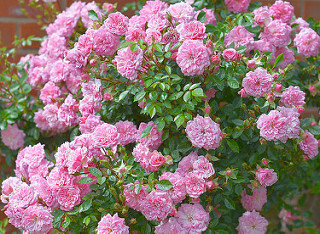

In [ ]:
PIL.Image.open(str(roses[1]))

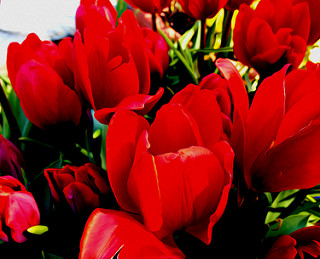

In [ ]:
tulips =  list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [ ]:
flower_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/14107161906_5737e0e4ec.jpg'),
 PosixPath('datasets/flower_photos/roses/19153732586_9de58c8f53_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4065283966_9504b98269.jpg'),
 PosixPath('datasets/flower_photos/roses/22679076_bdb4c24401_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4325834819_ab56661dcc_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15190665092_5c1c37a066_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5148639829_781eb7d346.jpg'),
 PosixPath('datasets/flower_photos/roses/16903172207_2cd7aca66a.jpg'),
 PosixPath('datasets/flower_photos/roses/3705716290_cb7d803130_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4061451210_1650590c6a.jpg'),
 PosixPath('datasets/flower_photos/roses/4979895172_ca06eba616.jpg'),
 PosixPath('datasets/flower_photos/roses/6879112993_5a29208438_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4675532860_890504a4a3_m.jpg'),
 PosixPath('datasets/flower_photos/roses/20825078671_90b0389c70_m.jpg'),
 

In [ ]:
flower_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [ ]:
str(flower_images_dict['roses'][0])

'datasets/flower_photos/roses/14107161906_5737e0e4ec.jpg'

In [ ]:
img = cv2.imread(str(flower_images_dict['roses'][0]))

In [ ]:
img

array([[[  2,   0,  59],
        [ 13,   8,  63],
        [ 13,   9,  75],
        ...,
        [ 84,  86, 234],
        [ 52,  55, 193],
        [ 77,  76, 202]],

       [[  9,   5,  70],
        [  5,   3,  62],
        [  5,   5,  65],
        ...,
        [ 66,  49, 242],
        [ 84,  67, 208],
        [232, 245, 229]],

       [[ 13,   9,  98],
        [  8,  10,  68],
        [  4,  17,  69],
        ...,
        [172, 167, 198],
        [243, 246, 251],
        [ 96,  97, 125]],

       ...,

       [[  6,   6,  76],
        [  4,   0,  20],
        [  8,   9,  69],
        ...,
        [  2,   4,  39],
        [  1,   6,  39],
        [  6,   9,  64]],

       [[ 15,  15, 109],
        [  5,   4,  38],
        [ 25,  18, 129],
        ...,
        [  8,   0,  62],
        [  3,   0,  67],
        [  5,   7,  77]],

       [[ 11,   7,  78],
        [ 15,  16,  96],
        [  3,   2,  96],
        ...,
        [  3,   0,  79],
        [  8,   6,  82],
        [ 11,   6,  97]]

In [ ]:
img.shape

(313, 500, 3)

In [ ]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [ ]:
X, y =[], []
for flower_name, images in flower_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape

(2752, 180, 180, 3)

In [ ]:
X_train_scaled = X_train/255
X_test_Scaled = X_test/255

In [ ]:

num_classes = 5
model = keras.Sequential([
                          keras.layers.Conv2D(filters=16, kernel_size = (3,3) , padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(),
                          keras.layers.Conv2D(filters=32, kernel_size = (3,3) , padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(),
                          keras.layers.Conv2D(filters=64, kernel_size = (3,3) , padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=2)


Epoch 1/2
86/86 [==============================] - 81s 931ms/step - loss: 1.4884 - accuracy: 0.3699
Epoch 2/2
86/86 [==============================] - 80s 931ms/step - loss: 1.0615 - accuracy: 0.5890


In [ ]:
model.evaluate(X_test_Scaled, y_test)

29/29 [==============================] - 8s 272ms/step - loss: 0.9870 - accuracy: 0.6046


[0.9869592189788818, 0.6045751571655273]

In [ ]:
predictions = model.predict(X_test_Scaled)

In [ ]:
predictions

array([[-0.84808445,  1.9911197 , -1.5400196 , -1.9359533 , -0.39430356],
       [-0.7191593 , -0.7183074 , -0.05459812, -0.77470374, -0.38686398],
       [-0.51033396,  0.14660421,  1.5753254 , -1.2205921 , -1.0771531 ],
       ...,
       [-2.1335402 , -1.3035156 , -0.7114604 ,  0.5448647 ,  0.266112  ],
       [ 1.3394835 , -1.7565527 , -2.7683272 , -2.6105142 ,  2.0616925 ],
       [-0.32976806, -0.34000066, -0.36652145,  1.0466914 , -0.19143778]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.04874732, 0.83368415, 0.02440322, 0.01642462, 0.07674064],
      dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

In [ ]:
data_augmentation = keras.Sequential([
                  keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
                  keras.layers.experimental.preprocessing.RandomRotation(0.3),
                  keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

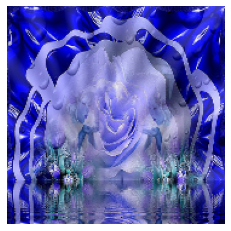

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
#data_augmentation(X)[0]

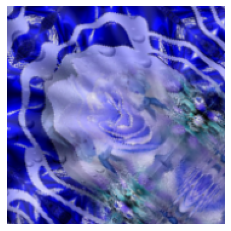

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5
model = keras.Sequential([
                          data_augmentation,
                          keras.layers.Conv2D(filters=16, kernel_size = (3,3) , padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(),
                          keras.layers.Conv2D(filters=32, kernel_size = (3,3) , padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(),
                          keras.layers.Conv2D(filters=64, kernel_size = (3,3) , padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(),
                          keras.layers.Dropout(0.2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 95s 1s/step - loss: 1.5528 - accuracy: 0.3307
Epoch 2/30
86/86 [==============================] - 96s 1s/step - loss: 1.1632 - accuracy: 0.5254
Epoch 3/30
86/86 [==============================] - 95s 1s/step - loss: 1.0621 - accuracy: 0.5676
Epoch 4/30
86/86 [==============================] - 95s 1s/step - loss: 1.0167 - accuracy: 0.6021
Epoch 5/30
86/86 [==============================] - 95s 1s/step - loss: 0.9419 - accuracy: 0.6384
Epoch 6/30
86/86 [==============================] - 95s 1s/step - loss: 0.8759 - accuracy: 0.6526
Epoch 7/30
86/86 [==============================] - 95s 1s/step - loss: 0.8519 - accuracy: 0.6621
Epoch 8/30
86/86 [==============================] - 95s 1s/step - loss: 0.8136 - accuracy: 0.6759
Epoch 9/30
86/86 [==============================] - 96s 1s/step - loss: 0.7901 - accuracy: 0.6868
Epoch 10/30
86/86 [==============================] - 95s 1s/step - loss: 0.7425 - accuracy: 0.7071
Epoch 11/30
86/86 [

In [ ]:
model.evaluate(X_test_Scaled, y_test)

29/29 [==============================] - 10s 337ms/step - loss: 0.7929 - accuracy: 0.7146


[0.7928733825683594, 0.7145969271659851]

In [ ]:
predictions = model.predict(X_test_Scaled)

In [ ]:
predictions

array([[-1.3935368 ,  7.8387885 ,  1.329197  , -0.27547795, -1.444738  ],
       [ 2.2816381 ,  3.1657243 , -1.8011426 , -0.9565113 ,  0.5996428 ],
       [ 0.6680904 ,  2.2299602 ,  6.172638  , -6.9311466 , -0.13484961],
       ...,
       [-1.8004091 ,  0.16154128, -0.80172426,  5.835184  ,  0.05948156],
       [ 5.5691495 , -0.5614932 , -2.6763082 , -2.6941123 ,  5.2779207 ],
       [-2.163436  , -2.321309  ,  2.3013132 ,  3.710199  , -1.533327  ]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions)
score

<tf.Tensor: shape=(918, 5), dtype=float32, numpy=
array([[9.7632255e-05, 9.9802482e-01, 1.4861466e-03, 2.9864843e-04,
        9.2759212e-05],
       [2.7300993e-01, 6.6089451e-01, 4.6030874e-03, 1.0711935e-02,
        5.0780512e-02],
       [3.9678849e-03, 1.8917795e-02, 9.7533470e-01, 1.9872493e-06,
        1.7776517e-03],
       ...,
       [4.7896153e-04, 3.4069442e-03, 1.3002413e-03, 9.9173743e-01,
        3.0763871e-03],
       [5.7141542e-01, 1.2429326e-03, 1.4996683e-04, 1.4732043e-04,
        4.2704427e-01],
       [2.2412974e-03, 1.9139741e-03, 1.9476704e-01, 7.9686892e-01,
        4.2087436e-03]], dtype=float32)>

In [ ]:
y_pred = [np.argmax(i) for i in score]
y_pred[:5]

[1, 1, 2, 4, 2]

In [ ]:
y_test[:5]

array([1, 0, 2, 4, 2])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.70      0.62       176
           1       0.81      0.81      0.81       154
           2       0.80      0.78      0.79       226
           3       0.73      0.94      0.82       150
           4       0.71      0.42      0.53       212

    accuracy                           0.71       918
   macro avg       0.72      0.73      0.71       918
weighted avg       0.72      0.71      0.71       918

